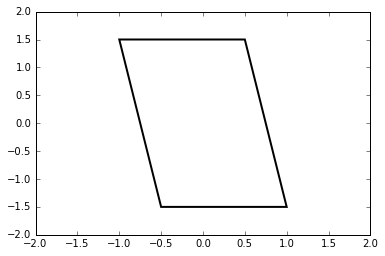

In [1]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib.transforms as mplTransforms
import numpy as np
%matplotlib inline

verts = [
    (-0.5, -1.5), # left, bottom
    (-1., 1.5), # left, top
    (0.5, 1.5), # right, top
    (1., -1.5), # right, bottom
    (-0.5, -1.5), # ignored
        ]

codes = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY,
         ]

path = Path(verts, codes)

fig = plt.figure()
ax = fig.add_subplot(111)
patch = patches.PathPatch(path, facecolor='w', lw=2)
ax.add_patch(patch)


ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
plt.show()

In [13]:
not(path.contains_point((0,0)))

False

In [71]:
t_start = ax.transData
t = mplTransforms.Affine2D().rotate_deg(-5)
t_end = t_start + t

patch.set_transform(t_end)

ax.add_patch(patch)

plt.show()

[array([ 0.5,  1.5]), array([ 1. , -1.5])]


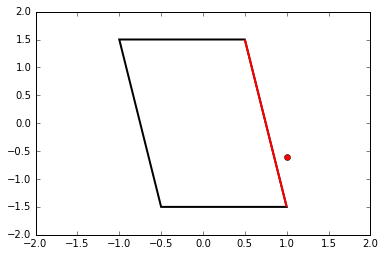

array([ 0.98639392,  0.16439899])

In [16]:
def find_nearest_line(point,path):
    ## Find the nearest line segment in a path to a point
    num_vertices = np.size(path.vertices[0:-1,0])
    distances = np.zeros((num_vertices))
    for i in range(num_vertices):
        ## For every line segment, find the distance
        line_segment = path.vertices[i+1]-path.vertices[i]
        line_to_point = path.vertices[i+1]-point
        distances[i] = np.linalg.norm(np.cross(line_to_point,line_segment))/np.linalg.norm(line_segment)
    nearest_line_start_vertex = path.vertices[np.argmin(distances)]
    verts = [path.vertices[np.argmin(distances)],path.vertices[np.argmin(distances)+1]]
    print(verts)
    codes = [Path.MOVETO,
         Path.LINETO]
    
    path_found = Path(verts, codes)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    patch_original = patches.PathPatch(path,facecolor='w',lw=2)
    ax.add_patch(patch_original)
    
    patch_found = patches.PathPatch(path_found,lw=2,color='r')
    ax.add_patch(patch_found)
    
    a = [point]
    
    plt.plot(*zip(*a), marker='o', color='r', ls='')
    
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    plt.show()
    
def find_nearest_normal(point,path):
    ## Find the normal vector to a path that is closest to a point
    num_vertices = np.size(path.vertices[0:-1,0])
    distances = np.zeros((num_vertices))
    for i in range(num_vertices):
        ## For every line segment, find the distance
        line_segment = path.vertices[i+1]-path.vertices[i]
        line_to_point = path.vertices[i+1]-point
        distances[i] = np.linalg.norm(np.cross(line_to_point,line_segment))/np.linalg.norm(line_segment)
    ## The closest line has the least distance. Find the starting vertex and the line segment
    nearest_line_start_vertex = path.vertices[np.argmin(distances)]
    line_vector = path.vertices[np.argmin(distances)+1] - path.vertices[np.argmin(distances)] 
    nearest_normal = np.array([[0,-1],[1,0]]).dot(line_vector) ## The normal vector is [-b,a]
    return nearest_normal/np.linalg.norm(nearest_normal)  ## Make it a unit vector
    

test_point = (1.,-0.6)
find_nearest_line(test_point,path)
find_nearest_normal(test_point,path)